# Consumer Households Notebook

## Package Import 

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.mode.chained_assignment = None # gets rid of chaining warning

### CSV Data Retrieval

In [2]:
# Data removed for privacy reasons
active_accts = pd.read_csv(, index_col = "hkey")

SyntaxError: invalid syntax (<ipython-input-2-287b1ba6a376>, line 2)

In [ ]:
# Changing the numeric categorical variables to a string
active_accts["ZIP"] = active_accts["ZIP"].astype(str)
active_accts['ZIP'] = [str(x)[0:2] for x in active_accts['ZIP']]   
active_accts["NETWORTH"] = active_accts["NETWORTH"].astype(str)

In [ ]:
# Identified outliers
active_accts = active_accts.drop(labels = [227071, 387064,501403], axis = 0)

In [ ]:
# Filter to the consumer only group
active_accts = active_accts[(active_accts["sum_smallbiz_flag"] == 0) & (active_accts["sum_consumer_flag"] > 0)]

In [ ]:
# Filter out people older than 110 and 0
active_accts = active_accts[active_accts['avg_age'] < 110]
active_accts = active_accts[active_accts['avg_age'] > 0]

In [ ]:
# Making the hkey the index
hkey_list = active_accts.index

In [ ]:
active_accts.shape

### Dummy Variables

In [ ]:
# Variables removed for privacy reasons
dummies = pd.get_dummies(active_accts[[]])
active_accts_dummies = pd.concat([active_accts, dummies], axis = 1)
active_accts_dummies = active_accts_dummies.drop(columns = [])

# Smallbiz flag is all 0 and sbloan flag is >99% 0
active_accts_dummies = active_accts_dummies.drop(columns = [])

### Standardization

In [3]:
scaler = StandardScaler()

# Shuffles the data
active_accts_dummies = active_accts_dummies.sample(frac = 1, random_state = 42)

active_accts_std = scaler.fit_transform(active_accts_dummies)

active_accts_std = pd.DataFrame(active_accts_std, columns = active_accts_dummies.columns)

# Adding back hkey index since scaler changes index
active_accts_std = active_accts_std.set_index(hkey_list)

NameError: name 'active_accts_dummies' is not defined

# MiniBatch with PCA

In [4]:
pca = PCA()
pca.fit(active_accts_std)

NameError: name 'active_accts_std' is not defined

In [5]:
plt.figure(figsize = (12, 9))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.axhline(y=0.8, color = 'r', linestyle = '-')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 864x648 with 0 Axes>

## Determine Optimal Components

In [6]:
n_comps = 60
pca = PCA(n_components = n_comps)
pca.fit(active_accts_std)

NameError: name 'active_accts_std' is not defined

In [7]:
comp_list = []
for i in range(1, n_comps+1):
    comp_list.append(f'Component {i}')

active_accts_pca_comp = pd.DataFrame(data = pca.components_,
                        columns = active_accts_dummies.columns.values,
                        index = comp_list)
active_accts_pca_comp.head()

AttributeError: 'PCA' object has no attribute 'components_'

In [8]:
scores_pca = pca.transform(active_accts_std)

NameError: name 'active_accts_std' is not defined

In [9]:
scores_pca = pd.DataFrame(scores_pca, columns = comp_list)

scores_pca = scores_pca.set_index(hkey_list)

NameError: name 'scores_pca' is not defined

# Cluster Sizes

## Inertia and Average Silhouette Scores

In [10]:
data = scores_pca.sample(50000)
inertia =[]
sil =[]
    
for k in range(2,14):
    print(k)
    kmeans_rand = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans_rand.fit(data)
    y_pred = kmeans_rand.predict(data)
        
    inertia.append(kmeans_rand.inertia_)
    sil.append((k, silhouette_score(data, y_pred, sample_size = 100000, random_state = 0)))
        
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(range(2,14), inertia, marker = 'o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
    
x_sil = [x[0] for x in sil]
y_sil = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil, marker = 'o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

NameError: name 'scores_pca' is not defined

## Silhouette Plots

NameError: name 'data' is not defined

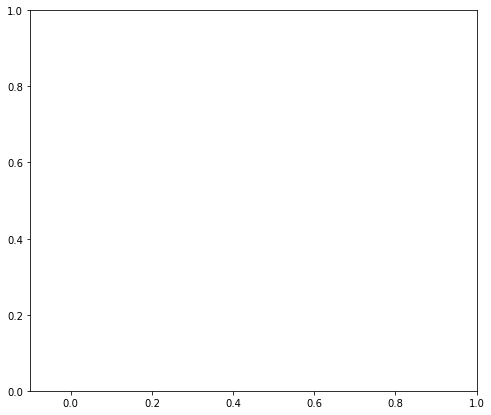

In [11]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(8, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data, cluster_labels, sample_size = 10000, random_state = 0)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Heirarchical Clusters

In [12]:
active_accts_std_sample = active_accts_std.sample(n = 10000, random_state = 0)

NameError: name 'active_accts_std' is not defined

In [13]:
hier_clust = linkage(active_accts_std_sample, method = 'ward')

NameError: name 'active_accts_std_sample' is not defined

NameError: name 'hier_clust' is not defined

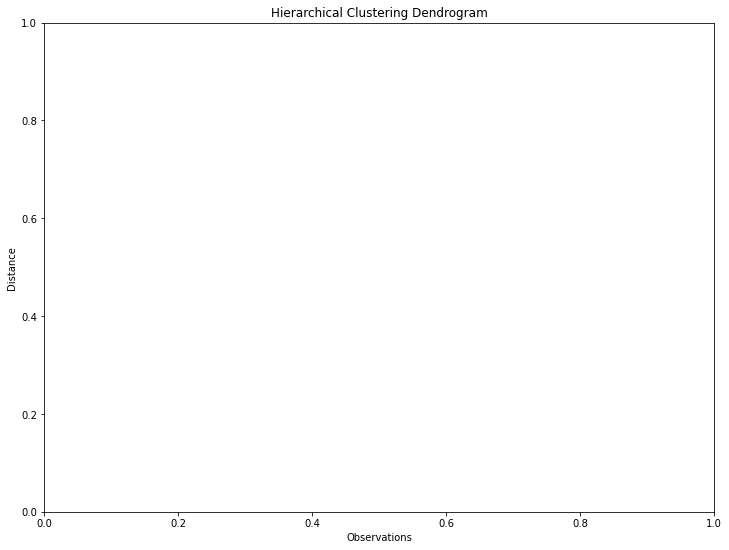

In [14]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 3,
          show_leaf_counts = True,
          no_labels = False)
plt.show()

## Determine Optimal Clusters

In [15]:
minipca_clusters = 2

In [16]:
# Fitting the model
minikmeans_pca = MiniBatchKMeans(n_clusters = minipca_clusters, init = 'k-means++', random_state = 0)
minikmeans_pca.fit(scores_pca)

NameError: name 'scores_pca' is not defined

In [17]:
# Adding cluster labels to each household
active_accts_mini_pca = pd.concat([active_accts_dummies, scores_pca], axis = 1)

# Adding a column for each new PCA component
active_accts_mini_pca.columns.values[0-n_comps:] = comp_list
active_accts_mini_pca["Segment"] = minikmeans_pca.labels_

NameError: name 'active_accts_dummies' is not defined

In [18]:
# Creating frequency chart for each segment
# Sorts and labels clusters from smallest to largest so group 0 is the smallest group by size
active_accts_mini_pca_freq = active_accts_mini_pca.groupby(["Segment"]).mean()
active_accts_mini_pca_freq["N Obs"] = active_accts_mini_pca[["Segment", "avg_inv_bal"]].groupby(["Segment"]).count()
active_accts_mini_pca_freq["Prop Obs"] = active_accts_mini_pca_freq["N Obs"] / active_accts_mini_pca_freq["N Obs"].sum()
active_accts_mini_pca_freq = active_accts_mini_pca_freq.sort_values('N Obs')
active_accts_mini_pca_freq = active_accts_mini_pca_freq.reset_index()
active_accts_mini_pca_freq.index.name = 'Sorted Segments'

# Segment has group number classified by kmeans while Sorted Segments has clusters ordered by size
# Maps back to non frequency table
active_accts_mini_pca['Segment'] = active_accts_mini_pca['Segment'].map(dict(zip(list(active_accts_mini_pca_freq["Segment"]),list(active_accts_mini_pca_freq.index))))
active_accts_mini_pca_freq

NameError: name 'active_accts_mini_pca' is not defined

### Summary Tables

In [19]:
dist_table_prop = pd.DataFrame({'KMini + PCA Prop': active_accts_mini_pca_freq.loc[:,'Prop Obs'],
                               'KMini + PCA N': active_accts_mini_pca_freq.loc[:,'N Obs']},
                          index = np.arange(minipca_clusters))
dist_table_prop

NameError: name 'active_accts_mini_pca_freq' is not defined

In [20]:
# A function that pulls out the top cluster centers for multiple models above a certain threshold
# model_list is a list of all models you've tried (KMeans, MiniBatch, KMedians, etc)
# model_names is a list of what you want the column names to be
# threshold is the cluster center threshold
# n_clust is the largest number of clusters among the models
# could be transformed into not a function if only working with one type of model
def feature_table(model_list,  model_names, threshold, n_clust):
    
    top_features = np.full((n_clust, 2), str)
    
    for i in range(len(model_list)):
        
        # obtain the cluster centers for the model
        cluster_centers = pd.DataFrame(data = model_list[i].cluster_centers_, columns = scores_pca.columns)
    
        for j in range(cluster_centers.shape[0]):
            curr_row = cluster_centers.iloc[j].copy() 
            # gets the indexes for cluster centers above a specific threshold
            indexes = (np.where(curr_row.abs() > threshold))
            # get the 3 largest absolute value cluster centers
            top_features[j][i] = abs(curr_row.iloc[indexes]).nlargest(3).index.values
        
    return pd.DataFrame(data = top_features, columns = model_names, index = np.arange(n_clust))

In [21]:
top_features_all = feature_table([minikmeans_pca, minikmeans_pca], ["Mini PCA", "Mini PCA Duplicated"], 0.5, minipca_clusters)
pd.options.display.max_colwidth = 500

AttributeError: 'MiniBatchKMeans' object has no attribute 'cluster_centers_'

In [22]:
top_features_all["Mini PCA Features"] = ''

for i in range(minipca_clusters):
    # filters PCA eigenvectors based on important components to each cluster
    comp_ind = list(top_features_all["Mini PCA"][i])
    top_pca_feats = []
    for j in range(len(comp_ind)):
        # Selects 3 most important features of each component
        top_ind = abs(active_accts_pca_comp.loc[comp_ind[j]]).nlargest(3).index
        # Appends the names of the top 3 features per correlated component
        top_pca_feats.append((top_ind.values, active_accts_pca_comp.loc[comp_ind[j]][top_ind].round(3)))
    top_features_all["Mini PCA Features"][i] = top_pca_feats
    
pd.options.display.max_colwidth = 1000
top_features_all

NameError: name 'top_features_all' is not defined

## Investigation of Segments

In [23]:
pd.set_option("display.max_columns", None)
active_accts_mini_pca[active_accts_mini_pca["Segment"] == 0].describe().round(2)

NameError: name 'active_accts_mini_pca' is not defined

In [24]:
active_accts_mini_pca[active_accts_mini_pca["Segment"] == 1].describe().round(2)

NameError: name 'active_accts_mini_pca' is not defined

In [25]:
description = active_accts_mini_pca.describe().round(2)
description.loc["5%"] = active_accts_mini_pca.quantile(0.1)
description.loc["95%"] = active_accts_mini_pca.quantile(0.95)
description

NameError: name 'active_accts_mini_pca' is not defined

NameError: name 'active_accts' is not defined

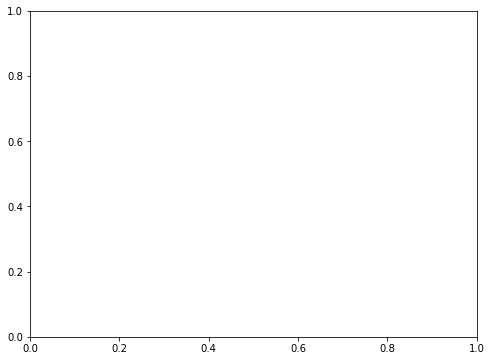

In [33]:
# Age Distribution

import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.distplot(active_accts["avg_age"], bins = 10, ax = ax, color = "b")
plt.axvline(active_accts["avg_age"].median(), color = 'red')